# WEEK 14 (29/01/18)

### Done


### To Do
* RUN EVERYTHING ON SMALLER SYSTEM TO MAKE SURE THERE'S NOTHING WRONG WITH THE CODE
* Analyse the mass dependency of $\epsilon$ from the plots
* Start clustering cities together to see if flow is different at intra-city and inter-city level

### Questions
* <font color='RED'> Why is epsilon negative?</font> 

## 1 Analysis on small system

Let's create a very small population with m = 1 to find exactly why epsilon goes negative.

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from hm.pop_models import pop_random, population
from hm.analysis.scaling.pop_hierarchy import pop_hier
from hm.analysis.scaling.plots import eps_distance
import hm.analysis.scaling.eps_scale
from matplotlib import pyplot as plt
import pandas

In [61]:
pop = pop_random.random(5)

In [62]:
pop.DM

array([[ 0.        ,  0.84441471,  0.68132301,  0.60804172,  0.97027787],
       [ 0.84441471,  0.        ,  0.16370552,  0.23711591,  0.18037779],
       [ 0.68132301,  0.16370552,  0.        ,  0.07344022,  0.31734556],
       [ 0.60804172,  0.23711591,  0.07344022,  0.        ,  0.38475118],
       [ 0.97027787,  0.18037779,  0.31734556,  0.38475118,  0.        ]])

In [65]:
h = pop_hier(pop, [0.1, 0.2, 0.3, 0.4, 0.5])
print(h.levels[0].clusters, h.levels[1].clusters)
odm_0 = h.gravity_ODM(0)
odm_1 = h.gravity_ODM(3)
print(odm_0, odm_1)

[4 2 1 1 3] [3 2 1 1 2]


A Jupyter Widget

A Jupyter Widget


[[ 0.          0.19149561  0.29414691  0.3693207   0.14503678]
 [ 0.01607624  0.          0.4277297   0.20388003  0.35231403]
 [ 0.00917449  0.15891366  0.          0.78962328  0.04228857]
 [ 0.0127191   0.08363766  0.87187718  0.          0.03176606]
 [ 0.02190917  0.63394552  0.20481097  0.13933434  0.        ]] [[ 0.  4.]
 [ 1.  0.]]


In [8]:
import seaborn as sns; sns.set()

In [66]:
eps_1 = h.epsilon(1)
eps_2 = h.epsilon(2)
eps_3 = h.epsilon(3)
eps_4 = h.epsilon(4)
eps_5 = h.epsilon(5)

AttributeError: 'Clusters' object has no attribute 'clustered_area'

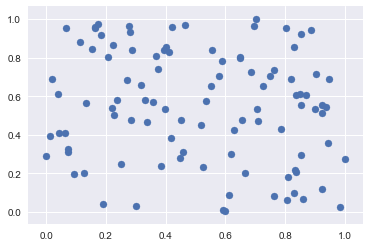

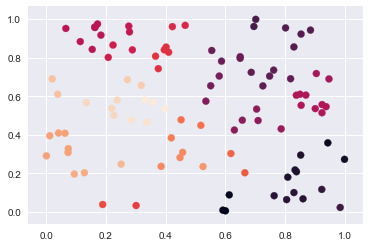

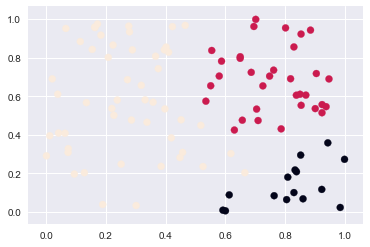

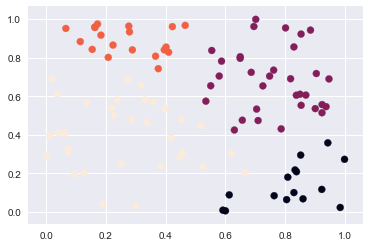

In [45]:
plt.scatter(pop.locCoords.T[0], pop.locCoords.T[1])
plt.show()
level_1 = h.levels[0]
level_1.viz_clusters()
level_5 = h.levels[4]
level_5.viz_clusters()
level_5.clusters_num
level_4 = h.levels[3]
level_4.viz_clusters()

In [11]:
for i in eps_4:
    print(i)

[ 0.          0.14141414  0.14141414  0.14141414]
[ 0.32323232  0.          0.32323232  0.32323232]
[ 0.18181818  0.18181818  0.          0.18181818]
[ 0.32323232  0.32323232  0.32323232  0.        ]


In [12]:
level_5.clusters

array([1, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 3, 3, 3,
       2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 3, 3,
       3, 2, 2, 1, 3, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 1, 3, 1, 2, 2, 3, 2,
       2, 3, 2, 1, 3, 3, 3, 3], dtype=int32)

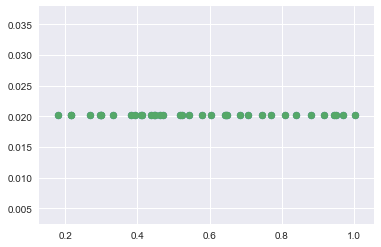

In [43]:
df = pandas.DataFrame(eps_1)
df
#let's try plotting individual locations e.g. loc 0
y = eps_1[0][1:]
x = h.cluster_population(h.levels[0]).DM[0][1:]
plt.scatter(x, y)
plt.show()